In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [2]:
df = pd.read_csv("score_updated.csv")

# Menampilkan 5 baris pertama
print("=== 5 Baris Pertama ===")
print(df.head())

# Cek nama kolom
print("\n=== Nama Kolom ===")
print(df.columns)

=== 5 Baris Pertama ===
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

=== Nama Kolom ===
Index(['Hours', 'Scores'], dtype='object')


In [3]:
# Melihat tipe data dan missing values
print("=== Info Dataset ===")
print(df.info())

# Cek jumlah data hilang
print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB
None

=== Jumlah Missing Values ===
Hours     0
Scores    0
dtype: int64


In [4]:
X = df[['Hours']]  # pastikan kolom sesuai
y = df['Scores']

print("Contoh nilai X:\n", X.head())
print("\nContoh nilai y:\n", y.head())

Contoh nilai X:
    Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5

Contoh nilai y:
 0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


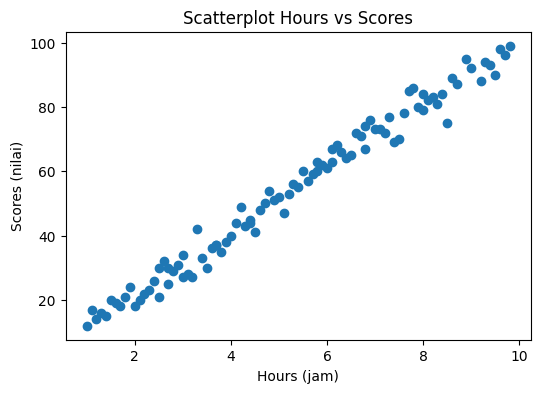

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(X, y)
plt.xlabel("Hours (jam)")
plt.ylabel("Scores (nilai)")
plt.title("Scatterplot Hours vs Scores")
plt.show()

In [6]:
# Ambil hanya kolom yang relevan
df_filtered = df[['Hours', 'Scores']].copy()

# Hitung IQR
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Filter outlier berdasarkan IQR
condition = ~(
    (df_filtered < (Q1 - 1.5 * IQR)) |
    (df_filtered > (Q3 + 1.5 * IQR))
).any(axis=1)

filtered_df = df[condition]

print("Jumlah data awal :", len(df))
print("Jumlah setelah filter:", len(filtered_df))

# Update variabel untuk modeling
df = filtered_df
X = df[['Hours']]
y = df['Scores']

Jumlah data awal : 96
Jumlah setelah filter: 96


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 76
Jumlah data test: 20


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model berhasil dilatih.")
print("Intercept  :", model.intercept_)
print("Koefisien :", model.coef_[0])

Model berhasil dilatih.
Intercept  : 2.4405655921340568
Koefisien : 9.835635077805753


In [9]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model ===")
print("R-squared :", r2)
print("RMSE      :", rmse)

=== Evaluasi Model ===
R-squared : 0.9708871356050831
RMSE      : 4.124008274830024


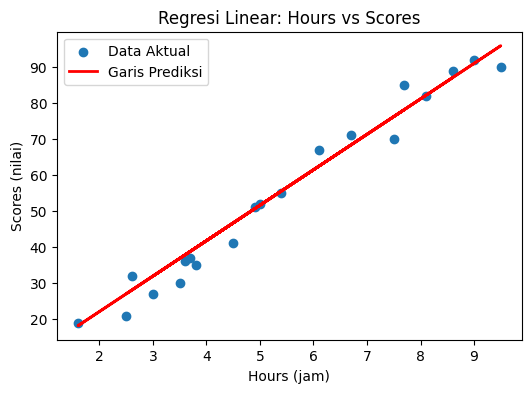

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Data Aktual")
plt.plot(X_test, y_pred, color="red", label="Garis Prediksi", linewidth=2)
plt.xlabel("Hours (jam)")
plt.ylabel("Scores (nilai)")
plt.title("Regresi Linear: Hours vs Scores")
plt.legend()
plt.show()

In [11]:
joblib.dump(model, "model_score.pkl")
print("Model disimpan sebagai model_score.pkl")

Model disimpan sebagai model_score.pkl


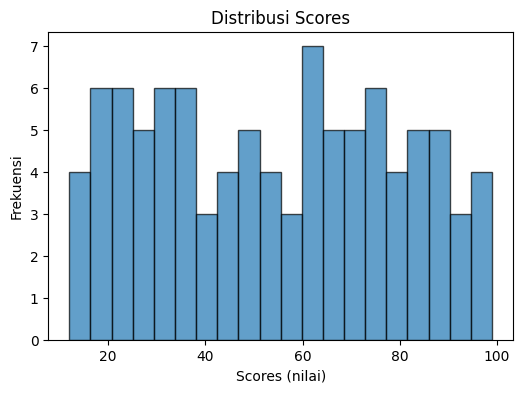

In [12]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Scores")
plt.xlabel("Scores (nilai)")
plt.ylabel("Frekuensi")
plt.show()

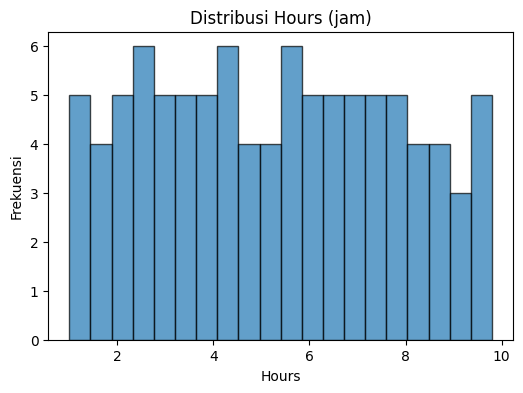

In [13]:
plt.figure(figsize=(6,4))
plt.hist(X, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Hours (jam)")
plt.xlabel("Hours")
plt.ylabel("Frekuensi")
plt.show()

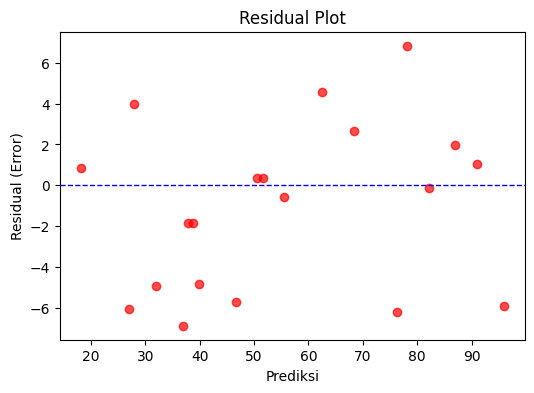

In [14]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7, color="red")  # titik residual merah
plt.axhline(0, color="blue", linestyle="--", linewidth=1)  # garis acuan hitam biar kontras
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residual (Error)")
plt.show()

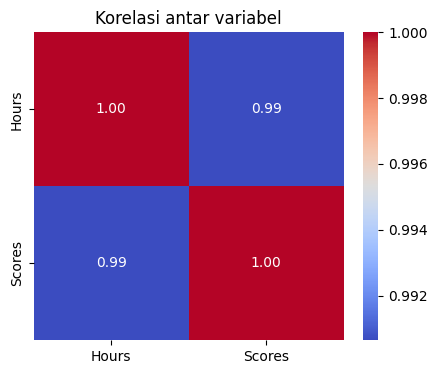

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(df[['Hours', 'Scores']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel")
plt.show()

In [16]:
!pip install --upgrade scikit-learn==1.7.2


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import sklearn
print(sklearn.__version__)

1.7.0


In [18]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
